In [2]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=2caaa38a4607115534146cacfdc18f14f81a526843200c57bb6a91bd48876bcf
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


1. General Overview:
   1.1 Size of the dataset: 250000 rows x 13 columns
   1.2 Missing Values:
      Customer ID: 0 missing values
      Purchase Date: 0 missing values
      Product Category: 0 missing values
      Product Price: 0 missing values
      Quantity: 0 missing values
      Total Purchase Amount: 0 missing values
      Payment Method: 0 missing values
      Customer Age: 0 missing values
      Returns: 47382 missing values
      Customer Name: 0 missing values
      Age: 0 missing values
      Gender: 0 missing values
      Churn: 0 missing values
   1.3 Data Types:
      Customer ID: IntegerType()
      Purchase Date: TimestampType()
      Product Category: StringType()
      Product Price: IntegerType()
      Quantity: IntegerType()
      Total Purchase Amount: IntegerType()
      Payment Method: StringType()
      Customer Age: IntegerType()
      Returns: DoubleType()
      Customer Name: StringType()
      Age: IntegerType()
      Gender: StringType()
      Churn: In

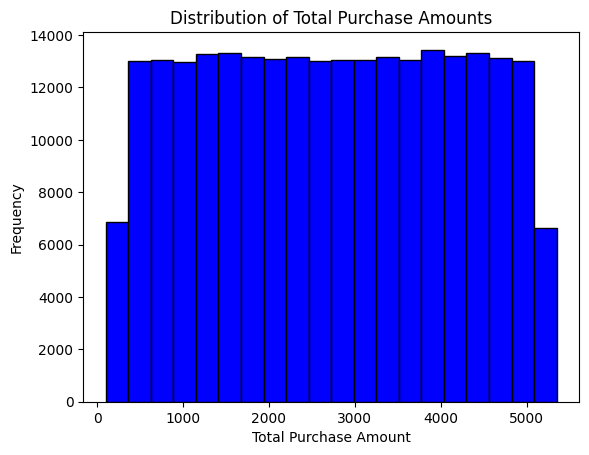

3.2 The product categories that are popular among customers are:
Most Popular Product Categories:
+----------------+-----+
|Product Category|count|
+----------------+-----+
|Electronics     |62630|
|Clothing        |62581|
|Home            |62542|
|Books           |62247|
+----------------+-----+

   3.3 Correlation between Product Price and Quantity: 0.002339292427171775

4. Churn Analysis:
   4.1 Overall Churn Rate: 0.20052
   4.2 Churn Distribution across Age Groups and Genders:
      Age: 18, Gender: Female, Churn Rate: 0.18739130434782608
      Age: 18, Gender: Male, Churn Rate: 0.1945337620578778
      Age: 19, Gender: Female, Churn Rate: 0.1936955620074658
      Age: 19, Gender: Male, Churn Rate: 0.2088
      Age: 20, Gender: Female, Churn Rate: 0.24784217016029594
      Age: 20, Gender: Male, Churn Rate: 0.2179128348660536
      Age: 21, Gender: Female, Churn Rate: 0.19217357613328168
      Age: 21, Gender: Male, Churn Rate: 0.2148014440433213
      Age: 22, Gender: Female, Chu

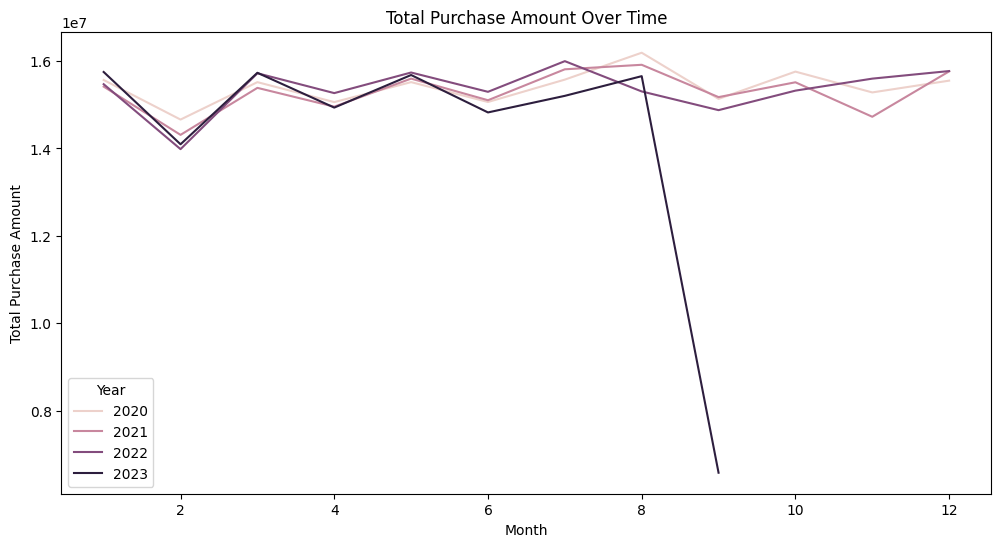

seasonal trends in total purchase amounts or product categories


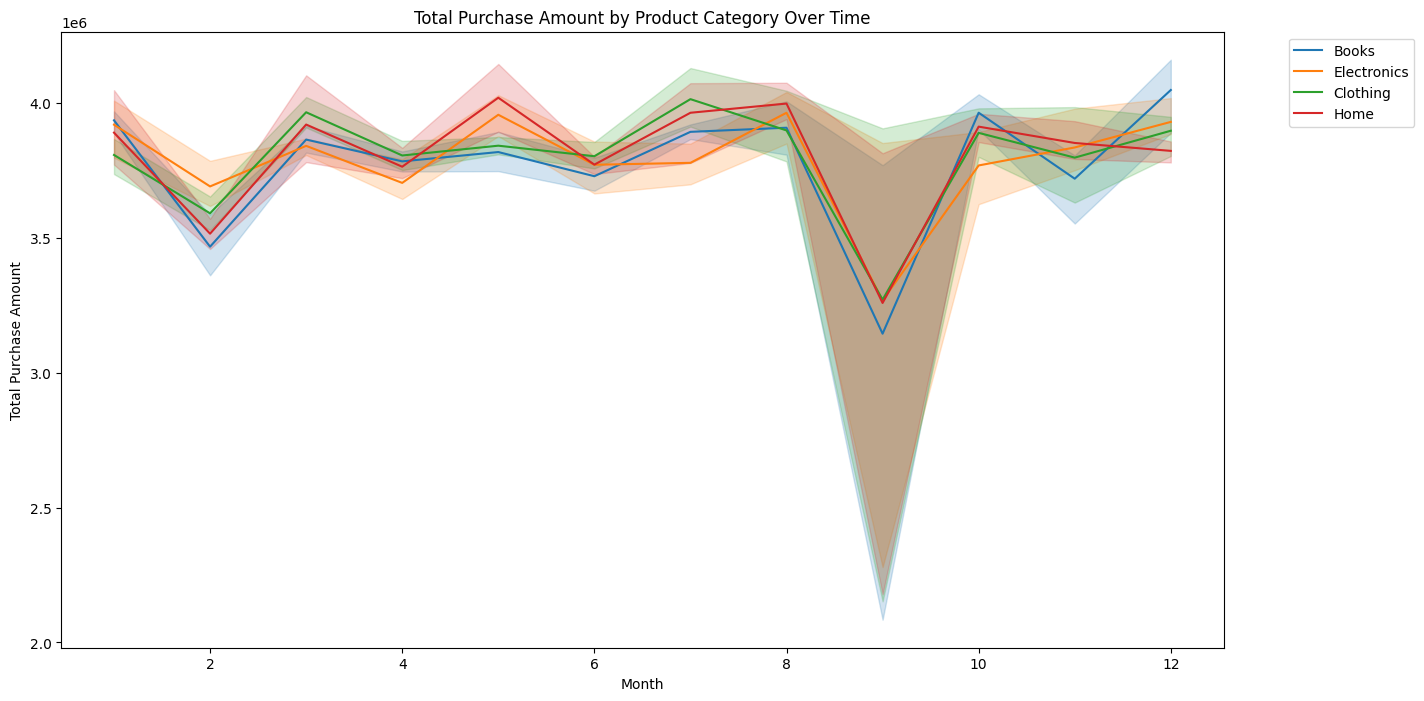


8. Correlation Analysis:
   8.1 Correlation between Product Price and Quantity: 0.002339292427171775
   8.2 Correlation between Churn and Product Price: 0.0011813320220758529, Churn and Quantity: -0.0013518830358739767

9. Customer Insights:
9.1 Top Spending Customers:
+-----------+-----------------+----------+
|Customer ID|    Customer Name|TotalSpent|
+-----------+-----------------+----------+
|      39895|Reginald Gonzales|     50659|
|      39717|    Joseph Kaiser|     50496|
|      48382|    Katelyn Clark|     50179|
|       6633|    Andre Spencer|     48499|
|      49743|   Bryan Gonzalez|     47015|
|      22821|   Larry Phillips|     46939|
|      24468|    Antonio Smith|     46683|
|      13805|  Timothy Proctor|     46567|
|        539|     Brad Sanford|     46390|
|      19960|   Patrick Gamble|     46255|
|      32869|     Sarah Garcia|     46080|
|      13400|        Jodi Moon|     46057|
|      14772|  Mrs. Holly Pope|     45642|
|       6347|      Lori Taylor|     45481

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg, max, min
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns


spark = SparkSession.builder.appName("YourAppName").getOrCreate()



# Creating a DataFrame from the sample data
df = spark.read.csv("/content/d.csv", header=True, inferSchema=True)

# 1. General Overview
# 1.1 Size of the dataset
num_rows = df.count()
num_columns = len(df.columns)

# 1.2 Missing values
missing_values = {col_name: df.filter(col(col_name).isNull()).count() for col_name in df.columns}

# 1.3 Data types
data_types = {col_name: str(df.schema[col_name].dataType) for col_name in df.columns}

# Output for General Overview
print("1. General Overview:")
print(f"   1.1 Size of the dataset: {num_rows} rows x {num_columns} columns")
print("   1.2 Missing Values:")
for col_name, missing_count in missing_values.items():
    print(f"      {col_name}: {missing_count} missing values")
print("   1.3 Data Types:")
for col_name, data_type in data_types.items():
    print(f"      {col_name}: {data_type}")

# 2. Customer Demographics
# 2.1 Distribution of customer ages
customer_age_distribution = df.groupBy("Customer Age").count().orderBy("Customer Age").collect()

# 2.2 Gender distribution
gender_distribution = df.groupBy("Gender").count().collect()

# 2.3 Check for outliers in customer demographics (assuming age is numeric)
age_stats = df.select("Customer Age").summary("mean", "stddev", "min", "max").collect()


# 2.3 Check for outliers in customer demographics (assuming age is numeric)
try:
    age_stats = df.select("Customer Age").summary("mean", "stddev", "min", "max").collect()
except ValueError:
    # If 'mean' is not supported, use alternative approach
    age_stats = df.selectExpr("avg(`Customer Age`) as mean", "stddev_samp(`Customer Age`) as stddev", "min(`Customer Age`) as min", "max(`Customer Age`) as max").collect()



# 3. Purchase Behavior
# 3.1 Distribution of total purchase amounts
purchase_amount_distribution = df.groupBy("Total Purchase Amount").count().orderBy("Total Purchase Amount").collect()

# 3.2 Most popular product categories
popular_categories = df.groupBy("Product Category").count().orderBy(col("count").desc()).collect()

# 3.3 Correlation between product price and quantity
correlation = df.stat.corr("Product Price", "Quantity")

# Output for Purchase Behavior
print("\n3. Purchase Behavior:")
print("   3.1 Distribution of Total Purchase Amounts:")
# Describe the distribution of total purchase amounts
purchase_amount_stats = df.describe("Total Purchase Amount").toPandas()



# Plot a histogram of total purchase amounts
plt.hist(df.select("Total Purchase Amount").rdd.flatMap(lambda x: x).collect(), bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Total Purchase Amounts")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Frequency")
plt.show()
print("3.2 The product categories that are popular among customers are:")

# Calculate the count of purchases for each product category
product_category_counts = df.groupBy("Product Category").count().orderBy(col("count").desc())

# Display the most popular product categories
print("Most Popular Product Categories:")
product_category_counts.show(truncate=False)



print(f"   3.3 Correlation between Product Price and Quantity: {correlation}")

# 4. Churn Analysis
# 4.1 Overall churn rate
churn_rate = df.select(avg("Churn")).collect()[0]['avg(Churn)']

# 4.2 Churn distribution across age groups and genders
churn_by_age_gender = df.groupBy("Age", "Gender").agg(avg("Churn").alias("Churn Rate")).orderBy("Age", "Gender").collect()

# 4.3 Distribution of churn across different product categories
churn_by_category = df.groupBy("Product Category").agg(avg("Churn").alias("Churn Rate")).orderBy(col("Churn Rate").desc()).collect()

# Output for Churn Analysis
print("\n4. Churn Analysis:")
print(f"   4.1 Overall Churn Rate: {churn_rate}")
print("   4.2 Churn Distribution across Age Groups and Genders:")
for row in churn_by_age_gender:
    print(f"      Age: {row['Age']}, Gender: {row['Gender']}, Churn Rate: {row['Churn Rate']}")
print("   4.3 Churn Distribution across Product Categories:")
for row in churn_by_category:
    print(f"      Category: {row['Product Category']}, Churn Rate: {row['Churn Rate']}")

# 5. Payment Methods
# 5.1 Preferred payment methods
preferred_payment_methods = df.groupBy("Payment Method").count().orderBy(col("count").desc()).collect()

# 5.2 Correlation between payment methods and total purchase amounts
payment_correlation = df.groupBy("Payment Method").agg(avg("Total Purchase Amount").alias("Avg Purchase Amount")).collect()

# Output for Payment Methods
print("\n5. Payment Methods:")
print("   5.1 Preferred Payment Methods:")
for row in preferred_payment_methods:
    print(f"      Method: {row['Payment Method']}, Count: {row['count']}")
print("   5.2 Correlation between Payment Methods and Total Purchase Amounts:")
for row in payment_correlation:
    print(f"      Method: {row['Payment Method']}, Avg Purchase Amount: {row['Avg Purchase Amount']}")

# 6. Returns
# 6.1 Frequency and distribution of product returns
return_distribution = df.groupBy("Returns").count().collect()

# 6.2 Product categories more prone to returns
returns_by_category = df.groupBy("Product Category").agg(avg("Returns").alias("Return Rate")).orderBy(col("Return Rate").desc()).collect()

# Output for Returns
print("\n6. Returns:")
print("   6.1 Frequency and Distribution of Product Returns:")
for row in return_distribution:
    print(f"      Returns: {row['Returns']}, Count: {row['count']}")
print("   6.2 Product Categories More Prone to Returns:")
for row in returns_by_category:
    print(f"      Category: {row['Product Category']}, Return Rate: {row['Return Rate']}")

# 7. Temporal Analysis (Assuming 'Purchase Date' is a timestamp column)
df1 = df.withColumn("Purchase Date", F.to_timestamp("Purchase Date", "dd-MM-yyyy HH:mm"))

# Extract month and year from the Purchase Date
df1 = df1.withColumn("Month", F.month("Purchase Date"))
df1 = df1.withColumn("Year", F.year("Purchase Date"))

# Aggregate total purchase amounts by month
monthly_purchase = df1.groupBy("Year", "Month").agg(F.sum("Total Purchase Amount").alias("Total Purchase Amount"))

# Convert to Pandas DataFrame for visualization
monthly_purchase_pd = monthly_purchase.toPandas()
print("7.1 Changes in Customer behavious over time")
# Plot total purchase amounts over time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="Total Purchase Amount", hue="Year", data=monthly_purchase_pd)
plt.title("Total Purchase Amount Over Time")
plt.xlabel("Month")
plt.ylabel("Total Purchase Amount")
plt.show()

# Identify seasonal trends in product categories (assuming 'Product Category' is a categorical variable)
category_trends = df1.groupBy("Year", "Month", "Product Category").agg(F.sum("Total Purchase Amount").alias("Total Purchase Amount"))

# Convert to Pandas DataFrame for visualization
category_trends_pd = category_trends.toPandas()
print("7.2 Seasonal trends in total purchase amounts or product categories")
# Plot total purchase amounts for each product category over time
plt.figure(figsize=(15, 8))
sns.lineplot(x="Month", y="Total Purchase Amount", hue="Product Category", data=category_trends_pd)
plt.title("Total Purchase Amount by Product Category Over Time")
plt.xlabel("Month")
plt.ylabel("Total Purchase Amount")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 8. Correlation Analysis
# 8.1 Correlations between numerical features
numerical_correlations = df.stat.corr("Product Price", "Quantity")

# 8.2 Correlation with the target variable (Churn)
churn_correlations = df.stat.corr("Churn", "Product Price"), df.stat.corr("Churn", "Quantity")

# Output for Correlation Analysis
print("\n8. Correlation Analysis:")
print(f"   8.1 Correlation between Product Price and Quantity: {numerical_correlations}")
print(f"   8.2 Correlation between Churn and Product Price: {churn_correlations[0]}, Churn and Quantity: {churn_correlations[1]}")

# 9. Customer Insights
print("\n9. Customer Insights:")

# Top spending customers
top_spending_customers = df.groupBy("Customer ID", "Customer Name").agg(sum("Total Purchase Amount").alias("TotalSpent"))
top_spending_customers = top_spending_customers.orderBy("TotalSpent", ascending=False)

# Customers with the highest frequency of purchases
high_frequency_customers = df.groupBy("Customer ID", "Customer Name").agg(count("Purchase Date").alias("PurchaseFrequency"))
high_frequency_customers = high_frequency_customers.orderBy("PurchaseFrequency", ascending=False)

# Show the results
print("9.1 Top Spending Customers:")
top_spending_customers.show()

print("9.2 Customers with Highest Frequency of Purchases:")
high_frequency_customers.show()


# 10. Product Insights
print("\n 10. Product Insights")
# Product categories contribution to total revenue
product_revenue = df.groupBy("Product Category").agg(sum("Total Purchase Amount").alias("TotalRevenue"))
product_revenue = product_revenue.orderBy("TotalRevenue", ascending=False)

# Average price and quantity of products in each category
avg_price_quantity = df.groupBy("Product Category").agg(avg("Product Price").alias("AvgPrice"), avg("Quantity").alias("AvgQuantity"))
avg_price_quantity = avg_price_quantity.orderBy("Product Category")

# Show the results
print("10.1 Product Categories Contribution to Total Revenue:")
product_revenue.show()

print("10.2 Average Price and Quantity of Products in Each Category:")
avg_price_quantity.show()



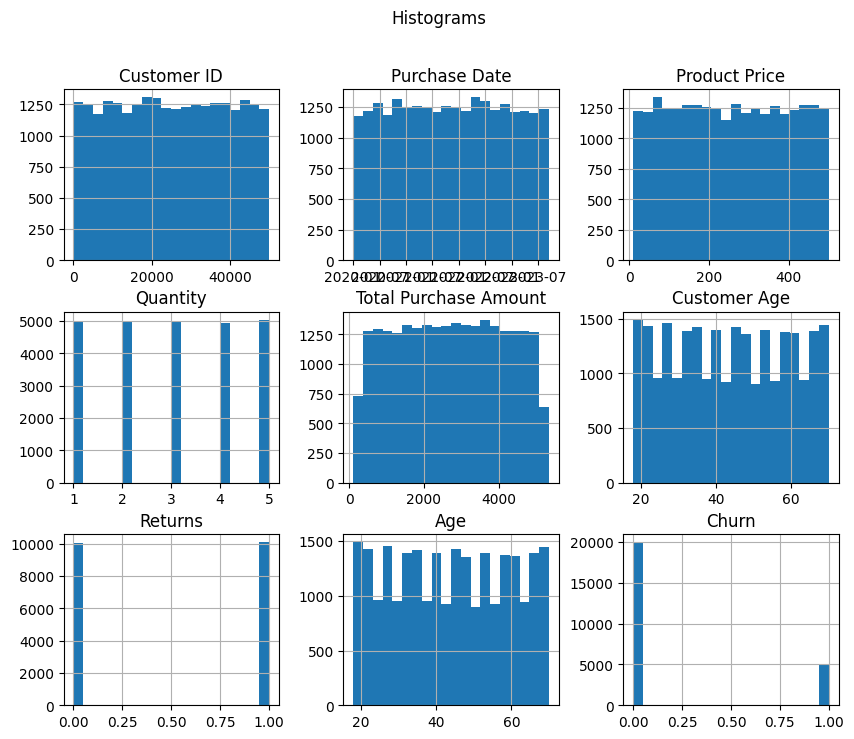

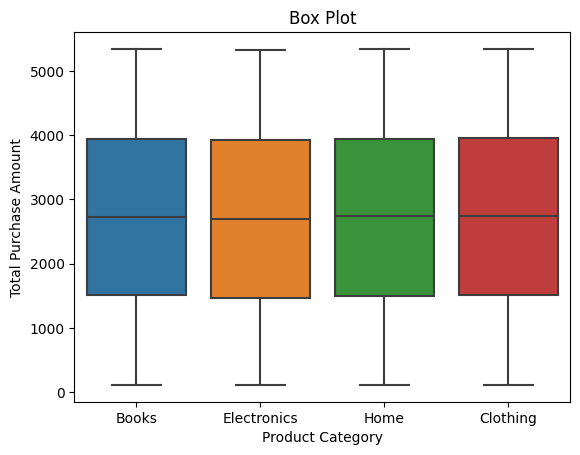

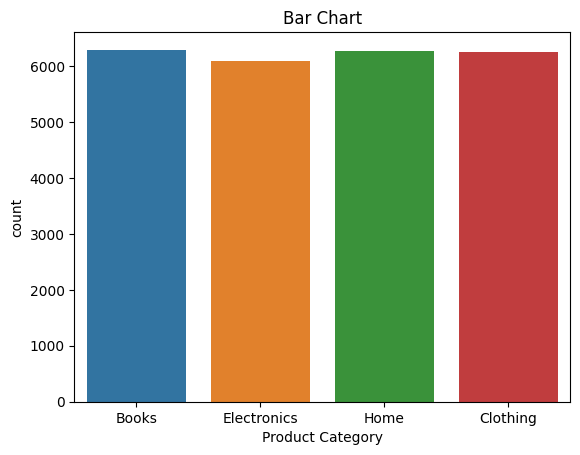

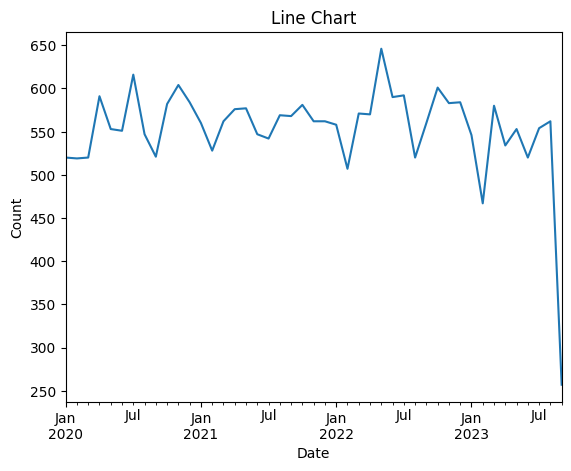

<ipython-input-49-b5a10ba119c8>:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_pd.corr()


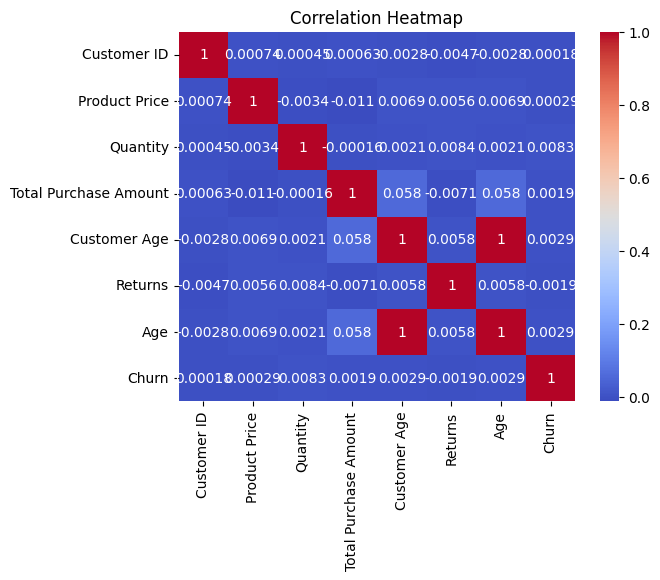

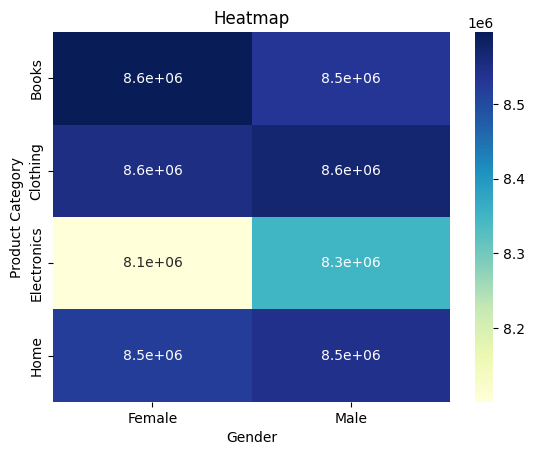

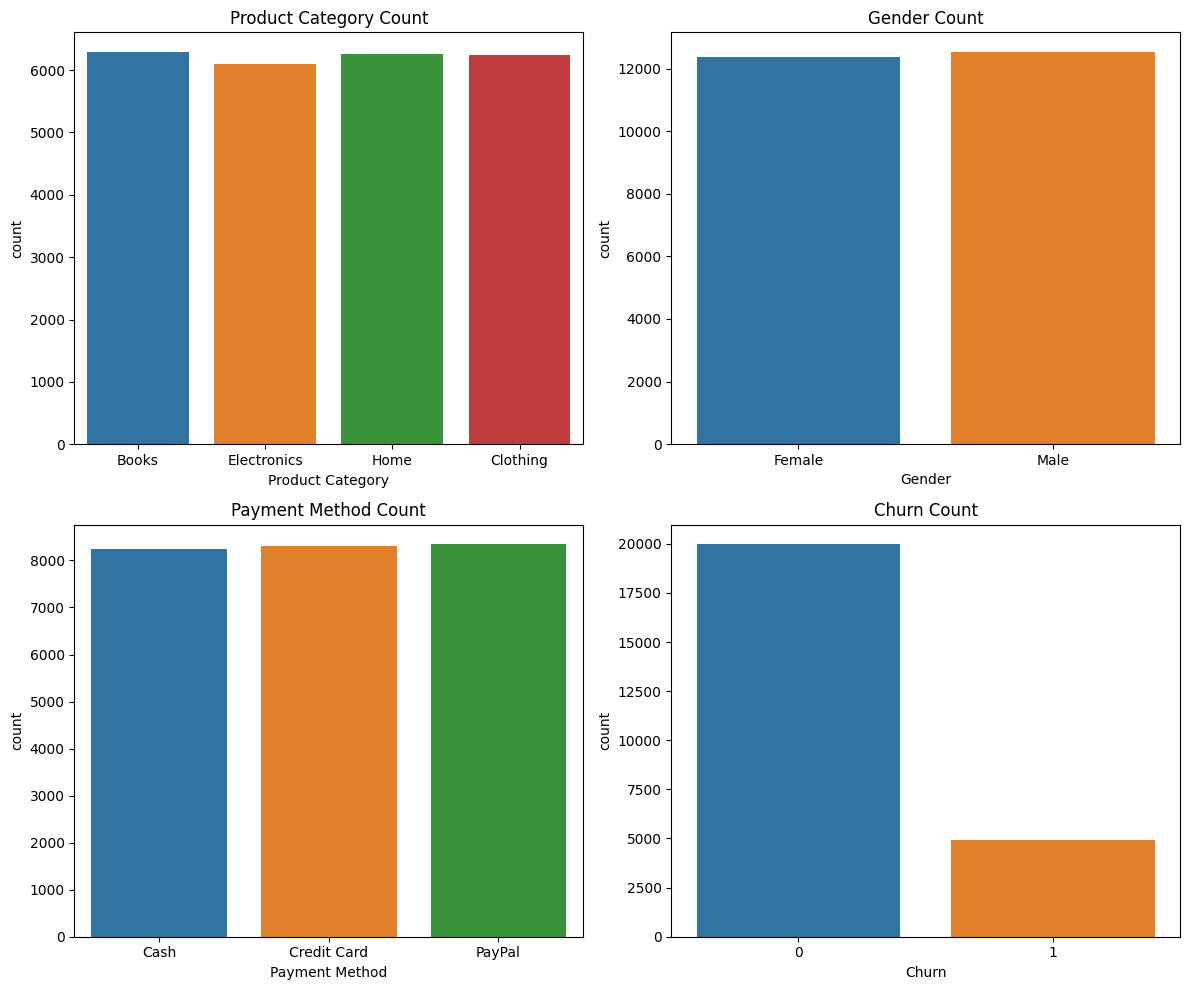

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Spark session
spark = SparkSession.builder.appName("DataVisualization").getOrCreate()

# Assuming 'df' is your DataFrame containing the purchase data
# Replace 'your_data_file.csv' with your actual data file or provide your DataFrame directly

# Load the data
df = spark.read.csv('/content/d.csv', header=True, inferSchema=True)

# Sample the data for visualization (optional)
df_sample = df.sample(False, 0.1)  # Adjust the fraction as needed

# Convert Spark DataFrame to Pandas for easier visualization
df_pd = df_sample.toPandas()
print("")
# Histogram
df_pd.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms")
plt.show()

# Box Plot
sns.boxplot(data=df_pd, x='Product Category', y='Total Purchase Amount')
plt.title("Box Plot")
plt.show()

# Bar Chart
sns.countplot(data=df_pd, x='Product Category')
plt.title("Bar Chart")
plt.show()

# Line Chart (assuming you have a temporal feature, e.g., 'Purchase Date')
df_pd['Purchase Date'] = pd.to_datetime(df_pd['Purchase Date'])
df_pd.set_index('Purchase Date', inplace=True)
df_pd.resample('M').count()['Customer ID'].plot()
plt.title("Line Chart")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap
correlation_matrix = df_pd.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Heatmap (example: Total Purchase Amount by Product Category and Gender)
heatmap_data = df_pd.pivot_table(values='Total Purchase Amount', index='Product Category', columns='Gender', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Heatmap")
plt.show()

# Count Plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.countplot(data=df_pd, x='Product Category', ax=axes[0, 0])
axes[0, 0].set_title("Product Category Count")

sns.countplot(data=df_pd, x='Gender', ax=axes[0, 1])
axes[0, 1].set_title("Gender Count")

sns.countplot(data=df_pd, x='Payment Method', ax=axes[1, 0])
axes[1, 0].set_title("Payment Method Count")

sns.countplot(data=df_pd, x='Churn', ax=axes[1, 1])
axes[1, 1].set_title("Churn Count")

plt.tight_layout()
plt.show()

# Stop the Spark session
spark.stop()


In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, expr, avg, stddev_samp

# Create a Spark session
spark = SparkSession.builder.appName("CustomerDemographicsAnalysis").getOrCreate()

# Assuming 'df' is your DataFrame containing the customer demographics data
# Replace 'your_data_file.csv' with your actual data file or provide your DataFrame directly

# Load the data
df = spark.read.csv('/content/d.csv', header=True, inferSchema=True)

# Calculate mean and standard deviation of Customer Age
mean_age = df.select(avg('Customer Age')).first()[0]
stddev_age = df.select(stddev_samp('Customer Age')).first()[0]

# Calculate z-score for Customer Age
df_with_zscore = df.withColumn("z_score", (col("Customer Age") - mean_age) / stddev_age)

# 1. Distribution of customer ages
age_distribution = df_with_zscore.select('Customer Age').rdd.flatMap(lambda x: x).histogram(10)
print("Distribution of Customer Ages:")
for i in range(len(age_distribution[0])-1):
    print(f"Age Range {age_distribution[0][i]}-{age_distribution[0][i+1]}: {age_distribution[1][i]}")

# 2. Gender distribution among customers
gender_distribution = df.groupBy('Gender').agg(count('*').alias('Count'))
print("Gender Distribution:")
gender_distribution.show()

# 3. Identify outliers or unusual values in customer demographics (using z-score)
outliers = df_with_zscore.filter((col("z_score") < -3) | (col("z_score") > 3))

print("Outliers in Customer Ages:")
outliers.select("Customer ID", "Customer Age").show()
print(outliers)

# Stop the Spark session
spark.stop()


Distribution of Customer Ages:
Age Range 18.0-23.2: 29304
Age Range 23.2-28.4: 24134
Age Range 28.4-33.6: 23638
Age Range 33.6-38.8: 23766
Age Range 38.8-44.0: 23171
Age Range 44.0-49.2: 28232
Age Range 49.2-54.4: 23139
Age Range 54.4-59.6: 22971
Age Range 59.6-64.80000000000001: 23410
Age Range 64.80000000000001-70: 28235
Gender Distribution:
+------+------+
|Gender| Count|
+------+------+
|Female|124324|
|  Male|125676|
+------+------+

Outliers in Customer Ages:
+-----------+------------+
|Customer ID|Customer Age|
+-----------+------------+
+-----------+------------+

DataFrame[Customer ID: int, Purchase Date: timestamp, Product Category: string, Product Price: int, Quantity: int, Total Purchase Amount: int, Payment Method: string, Customer Age: int, Returns: double, Customer Name: string, Age: int, Gender: string, Churn: int, z_score: double]
